In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from src import utils, nlp_utils
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords

from datetime import datetime

#nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Topical Modeling - Wall Street Market

## Data Processing

In [ ]:
# wallstreet = pd.read_csv('data/wallstreet.csv')
# wall_nlp = wallstreet[['subforum', 'contentWithHTMLTag']].copy()

In [ ]:
# wall_nlp['cleaned_content'] = wall_nlp['contentWithHTMLTag'].apply(lambda x: nlp_utils.clean_parse_text(x))
# wall_nlp['lemmatized_tokens'] = wall_nlp['contentWithHTMLTag'].apply(lambda x: nlp_utils.clean_tokenize_lemmatize(x))

In [ ]:
# wall_nlp.to_csv('data/wall_nlp.csv', index=False)

--- 
# LDA

In [2]:
wall_nlp = pd.read_csv('data/wall_nlp.csv')

In [6]:
# Must be even for visualizations.
n_topics = 20

cleaned_content = wall_nlp['lemmatized_tokens'].values
doc_topics, lda_model, vect = nlp_utils.convert_to_bow_and_fit_lda_model(cleaned_content, 10000, 0.15, n_topics, 'batch', 25, 3)

sorted_components = np.argsort(lda_model.components_, axis=1)[:, ::-1]
feat_names = np.array(vect.get_feature_names())

In [8]:
nlp_utils.print_topics(lda_model, vect, 10)


Topic #0:
quality high weed product the price stealth best gram strain

Topic #1:
use key using tor file click user it system the

Topic #2:
signup ref com ai the this lchudifyeqm4ldjj 2271281763 71713http site

Topic #3:
contact allowed external link please read not the by rules

Topic #4:
card use need know method like would carding one make

Topic #5:
fullz bank italian selling account service vouch check wallst4qihu6lvsa card

Topic #6:
the fake quality high de interested original gold if shop

Topic #7:
we order quality shipping product price mdma new euro free

Topic #8:
cashout bank guides 10 ssn records link extras money new

Topic #9:
pgp begin signature mirror use message bump end store signed

Topic #10:
utopia the we refund order with to reship be kush

Topic #11:
the to and you free fullz for deal listing with

Topic #12:
order like know would time good one make day people

Topic #13:
you btc wallet bitcoin good address code know see work

Topic #14:
id php x7bwsmcore5fmx

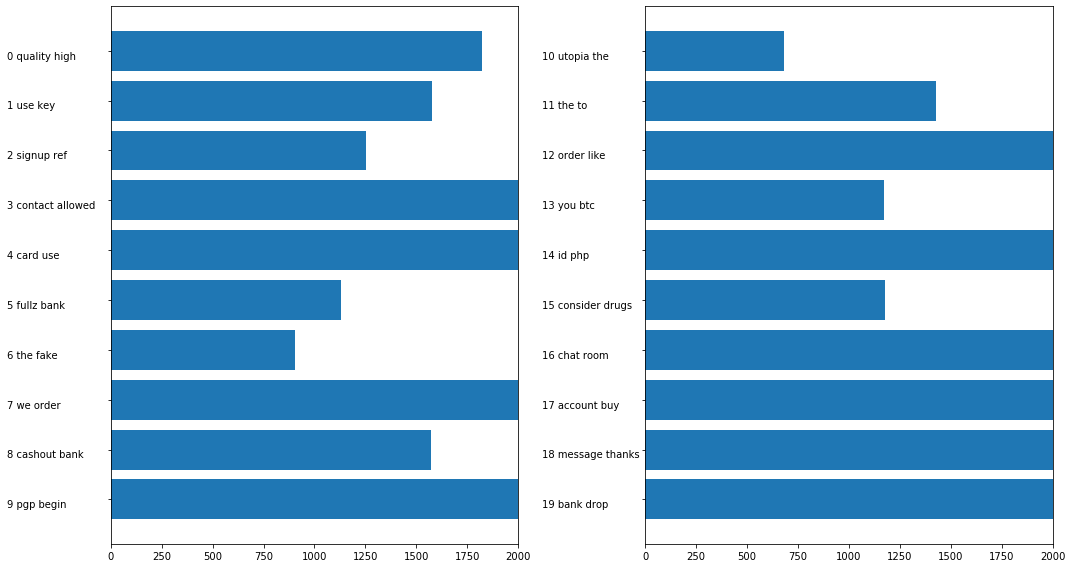

In [10]:
# Evaluate each topics (components) overall weight.
# Topics are named by the two most common words.

topics_per_plot = int(n_topics / 2)
barh_xlim = 2000
plot_pad = 100
fig_size = (15,8)
fig, ax = plt.subplots(1, 2, figsize=fig_size)

topic_names = ['{} {}'.format(i, ' '.join(words)) for i, words in enumerate(feat_names[sorted_components[:, :2]])]

for col in [0, 1]:
    start = col * topics_per_plot
    end = (col + 1) * topics_per_plot
    plot_width = np.sum(doc_topics, axis=0)[start:end]
    ax[col].barh(np.arange(topics_per_plot), plot_width)
    ax[col].set_yticks(np.arange(topics_per_plot))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, barh_xlim)
    y_ax = ax[col].get_yaxis()
    y_ax.set_tick_params(pad=plot_pad)

plt.tight_layout();